## 作业目录
### 1.单变量线性回归
#### 1.1 导入数据
#### 1.2 查看数据及其特征
#### 1.3 定义线性回归的代价函数
#### 1.4 数据预处理
#### 1.5 设置权重向量 w
#### 1.6 计算代价函数
### 2.Batch Gradient Decent（批量梯度下降）
#### 2.1 实现批量梯度下降算法
#### 2.2 初始化变量
#### 2.3 运行梯度下降算法
#### 2.4 计算训练模型的代价函数(误差)
#### 2.5 绘制线性模型并显示数据，查看拟合效果
### 3.多变量线性回归
#### 3.1 加载数据集
#### 3.2 特征标准化
#### 3.3 数据预处理并运行线性回归程序
#### 3.4 计算模型的代价(误差)
#### 3.5 查看训练进程
#### 3.6 使用scikit-learn的实现线性回归
### 4.L2正则化
### 5.L1正则化
### 6.调参
### 7. 最小二乘法(LSM)

刘佳辰 2021301525

In [469]:
# 例：导入函数库，并进行相关设置
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [470]:
#1.1 使用 pandas 库函数读取 regress_data1.csv 文件内的数据，将读入的数据命名为 data、
data  = pd.DataFrame(pd.read_csv("regress_data1.csv"))

In [471]:
# 1.2 （1）使用 data.head()查看导入的数据
#     （2)使用 data.describe() 查看数据特征
#     （3)根据读入的数据绘制散点图，x轴为"人口"，y轴为"收益"，
#          需要将标签转移成水平方向，所有字体的大小设置为18

In [472]:
# 1.2.(1)使用 data.head()查看导入的数据
data.head()


,人口,收益
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [473]:
# 1.2.(2)使用 data.describe() 查看数据特征
data.describe()

,人口,收益
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


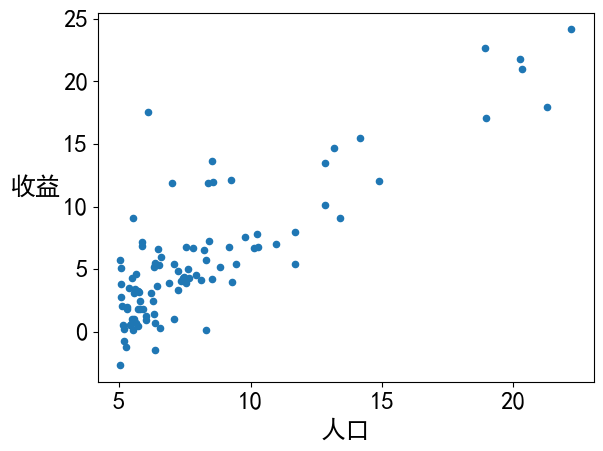

In [474]:
# 1.2.(3)根据读入的数据绘制散点图，x轴为"人口"，y轴为"收益"，
ax = data.plot.scatter(x="人口",y="收益")
plt.xlabel("人口",fontsize = 18)
plt.ylabel("收益",fontsize = 18,rotation = 0,labelpad = 20)
ax.tick_params(axis="both",labelsize = 18)
plt.show()

In [475]:
# 1.3 定义线性回归的代价函数
def computeCost(X, y, w):
    """
    计算线性回归模型的代价函数。
    参数：
    X -- 特征矩阵，形状为 (n_samples, n_features)
    y -- 标签向量，形状为 (n_samples,1)
    w -- 权重向量，形状为 (n_features,1)

    返回值：
    代价函数的值
    """
    inner = np.power(X @ w - y, 2)  # 计算预测值与实际值之差的平方和
    return np.sum(inner) / (2 * len(X))  # 对平方和进行求和并除以样本数量的两倍，得到代价函数的值

In [476]:
#1.4.(1)将一列名为'Ones'的值全为1的列插入到 data 的第一列位置
data.insert(0,"Ones",1)

In [477]:
#1.4.(2)获取 data 的列数
column = data.shape[1]

In [478]:
#1.4.(3)获取除最后一列外的所有列作为特征矩阵X
X = data.iloc[:,:2]

In [479]:
#1.4.(4)获取最后一列作为目标变量y
y = data.iloc[:,[-1]]

In [480]:
#1.4.(5)使用 head() 函数观察下 X (训练集) 和 y (目标变量)是否正确.
X.head()

,Ones,人口
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [481]:
#1.4.(5)使用 head() 函数观察下 X (训练集) 和 y (目标变量)是否正确.
y.head()

,收益
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [482]:
#1.4.(6)使用DataFrame类型数据的values属性将 X 和 y 转换为 Numpy 矩阵
X = X.values
y = y.values

In [483]:
#1.5 （1）使用 Numpy 初始化权重向量 w，w 的行数与 X 的列数相同，w 的列数为1，且要求初始时w的所有值为0
w = np.zeros((X.shape[1],1))

In [484]:
#1.5    （2）查看 X、w和 y 的维度
print(X.shape)
print(w.shape)
print(y.shape)

(97, 2)
(2, 1)
(97, 1)


In [485]:
#1.6 使用 computeCost 计算代价
cost = computeCost(X, y, w)
print(cost)

32.072733877455676


In [486]:
# 2.1 实现批量梯度下降算法
def batch_gradientDescent(X, y, w, alpha, count):
    """
    批量梯度下降算法实现。

    参数：
    X -- 特征矩阵，形状为 (n_samples, n_features)
    y -- 标签向量，形状为 (n_samples,1)
    w -- 权重向量，形状为 (n_features,1)
    alpha -- 学习率
    count -- 迭代次数

    返回值：
    w -- 更新后的权重向量
    costs -- 每次迭代的代价函数值列表
    """
    # 初始化代价函数值列表
    costs = []

    # 对每个样本进行迭代
    for i in range(count):
        # 根据公式更新权重向量
        w = w - (X.T @ (X @ w - y)) * alpha / len(X)

        # 计算当前代价函数值并添加到列表中
        cost = computeCost(X, y, w)
        costs.append(cost)

        # 每隔100次迭代输出一次当前代价函数值
        if i % 100 == 0:
            print("在第{}次迭代中，cost的值是：{}。".format(i, cost))

    # 返回最终的权重向量和代价函数值列表
    return w, costs

In [487]:
#2.2 初始化学习率 alpha = 0.01 ，迭代次数 iter = 2000
alpha = 0.01
iter = 2000

In [488]:
#2.3 使用 batch_gradientDescent 函数获取更新后的权重向量 w 和 损失值数组 cost，并输出权重向量 w
w,costs = batch_gradientDescent(X, y, w, alpha, iter)
print(w)

在第0次迭代中，cost的值是：6.737190464870007。
在第100次迭代中，cost的值是：5.476362817272741。
在第200次迭代中，cost的值是：5.173634551165022。
在第300次迭代中，cost的值是：4.962606493117519。
在第400次迭代中，cost的值是：4.815501494116686。
在第500次迭代中，cost的值是：4.712956453749759。
在第600次迭代中，cost的值是：4.6414735988143185。
在第700次迭代中，cost的值是：4.591643801766726。
在第800次迭代中，cost的值是：4.556908078409751。
在第900次迭代中，cost的值是：4.532694243543436。
在第1000次迭代中，cost的值是：4.515815084502823。
在第1100次迭代中，cost的值是：4.504048835517841。
在第1200次迭代中，cost的值是：4.495846731678219。
在第1300次迭代中，cost的值是：4.490129148489064。
在第1400次迭代中，cost的值是：4.4861434933249615。
在第1500次迭代中，cost的值是：4.483365143354072。
在第1600次迭代中，cost的值是：4.481428390613829。
在第1700次迭代中，cost的值是：4.480078304693718。
在第1800次迭代中，cost的值是：4.479137176818275。
在第1900次迭代中，cost的值是：4.478481128440361。
[[-3.78806857]
 [ 1.18221277]]


In [489]:
#2.4 使用 computeCost 函数重新计算代价并输出
computeCost(X,y,w)

4.478027609879971

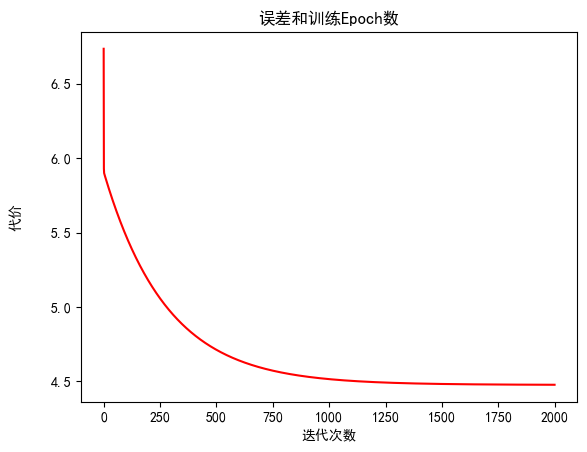

In [490]:
#2.5 绘制代价随迭代次数变化的折线图
#2.5.(1) 创建图形和轴对象
#2.5.(2) 绘制代价随迭代次数的变化曲线
#2.5.(3) 设置x轴和y轴标签，x轴为"迭代次数"，y轴为"代价"
#2.5.(4) 设置图标题为"误差和训练Epoch数"
#2.5.(5) 显示图形
fig,ax = plt.subplots()
ax.plot(range(len(costs)),costs,"r")
plt.xlabel("迭代次数")
plt.ylabel("代价",labelpad = 20)
plt.title("误差和训练Epoch数")
plt.show()

In [491]:
#3.1 （1）使用pandas库读取 regress_data2.csv 内的数据，将读入的数据命名为 data2
#    （2）使用 head() 查看读入的数据
data2 = pd.DataFrame(pd.read_csv("regress_data2.csv"))
data2.head()

,面积,房间数,价格
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [492]:
#3.2 对数据进行标准化 x =（x - x_mean）/x_std，随后使用head()查看标准化后的数据
mean = data2.mean()
std = data2.std()

data2 = (data2 - mean) / std

data2.head()

,面积,房间数,价格
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [493]:
#3.3 重复第1部分的预处理步骤，并对新数据集运行线性回归程序
#(1)添加一列全为1的列，在第一列处，且列名为"Ones"
#(2)设置X2（训练数据）和y2（目标变量），最后一列设置为目标变量y2，其余列设置为X2
#(3)将X2和y2转化为Numpy类型的数据，并设置权重向量w2，w2是大小(3,1)的权重向量，使用np.zeros()函数进行初始化
#(4)使用batch_gradientDescent函数在数据集上进行线性回归，并获取训练后的权重向量w2和损失值数组cost2
data2.insert(0,"Ones",1)
X2 = data2.iloc[:,:3]
y2 = data2.iloc[:,[-1]]
X2 = X2.values
y2 = y2.values
w2 = np.zeros((3,1))
w2,cost2 = batch_gradientDescent(X2,y2,w2,alpha,iter)

在第0次迭代中，cost的值是：0.4805491041076719。
在第100次迭代中，cost的值是：0.18209443801333897。
在第200次迭代中，cost的值是：0.14793824957386834。
在第300次迭代中，cost的值是：0.1377591345050687。
在第400次迭代中，cost的值是：0.13366037772496117。
在第500次迭代中，cost的值是：0.1319404652949001。
在第600次迭代中，cost的值是：0.13121540352412622。
在第700次迭代中，cost的值是：0.13090958448719198。
在第800次迭代中，cost的值是：0.13078058791637864。
在第900次迭代中，cost的值是：0.13072617594607358。
在第1000次迭代中，cost的值是：0.13070322444853422。
在第1100次迭代中，cost的值是：0.1306935432832584。
在第1200次迭代中，cost的值是：0.13068945967339027。
在第1300次迭代中，cost的值是：0.1306877371669466。
在第1400次迭代中，cost的值是：0.13068701059694005。
在第1500次迭代中，cost的值是：0.13068670412262967。
在第1600次迭代中，cost的值是：0.13068657484877846。
在第1700次迭代中，cost的值是：0.130686520319808。
在第1800次迭代中，cost的值是：0.13068649731895685。
在第1900次迭代中，cost的值是：0.13068648761697357。


In [494]:
#3.4 使用 computeCost 计算模型代价（针对w2）
computeCost(X2,y2,w2)

0.13068648355046528

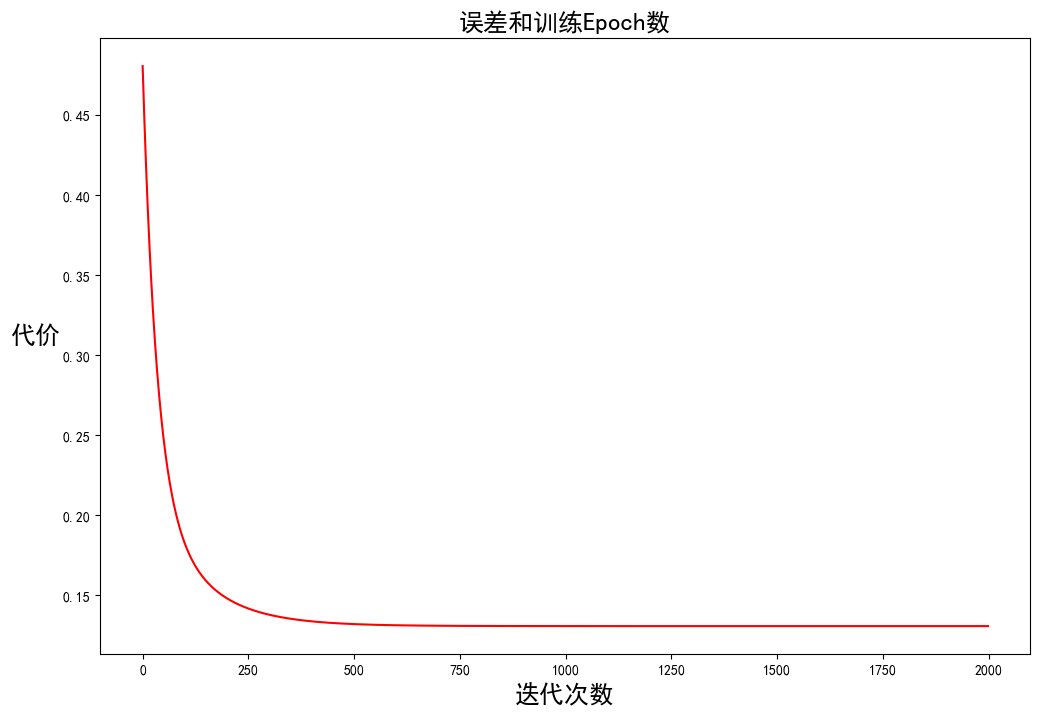

In [495]:
#3.5 查看训练进程（绘制代价随迭代次数变化的折线图）
#(1) 创建一个大小为 (12, 8) 的画布和坐标轴对象
#(2) 在坐标轴上绘制代价函数 cost2 随迭代次数 iters 的变化曲线，使用红色线条
#(3) 设置 x 轴标签为 "迭代次数",字体大小为 18
#(4) 设置 y 轴标签为 "代价",旋转角度为 0,字体大小为 18
#(4) 设置图表标题为 "误差和训练Epoch数",字体大小为 18
#(5) 显示图形
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(range(len(cost2)),cost2,"r")
plt.xlabel("迭代次数",fontsize = 18)
plt.ylabel("代价",fontsize = 18,rotation = 0,labelpad = 20)
plt.title("误差和训练Epoch数",fontsize = 18)
plt.show()

In [496]:
#3.6 使用scikit-learn的线性回归函数
#(1)从 sklearn.linear_model 库中导入线性回归模型 LinearRegression
from sklearn.linear_model import LinearRegression

In [497]:
#3.6.(2)创建线性回归模型对象
clf = LinearRegression()

In [498]:
#3.6.(3)使用训练数据 X 和标签 y 对模型进行拟合
clf.fit(X[:,1:2],y)

LinearRegression()

clf's coef:[[1.19303364]]


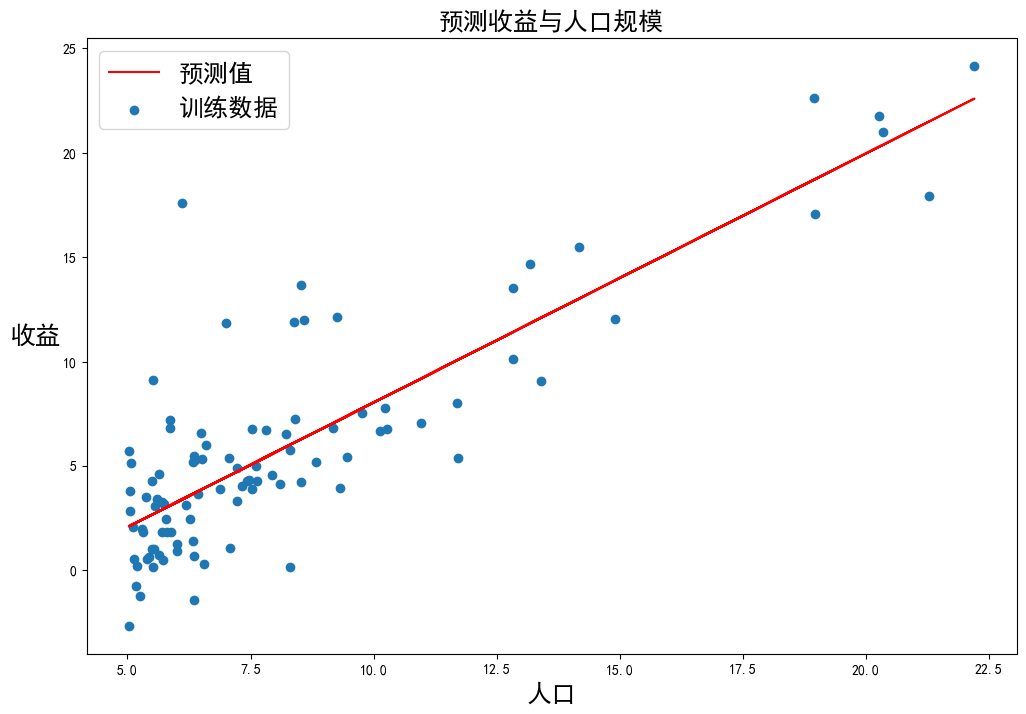

In [499]:
#3.6.(4)查看scikit-learn model的预测表现
#  1） 取特征矩阵 X 的第二列作为自变量 x
x = X[:, 1]
#  2） 使用模型对x进行预测，并将预测结果展平为一维数组 f
f = clf.predict(x.reshape(-1,1)).flatten()
#  3） 创建画布和坐标轴对象
fig,ax = plt.subplots(figsize=(12,8))
#  4） 在坐标轴上绘制预测值 f 随人口规模 x 的变化曲线，使用红色线条，并添加标签为"预测值"
ax.plot(x,f,"r",label = "预测值")
#  5） 在坐标轴上绘制训练数据点的散点图，并添加标签为"训练数据"
ax.scatter(x,y,label = "训练数据")
#  6） 显示图例，并设置位置和字体大小（loc = 2,fontsize=18）
ax.legend(loc=2,fontsize = 18)
#  7） 设置 x 轴标签为"人口"，字体大小为18
ax.set_xlabel('人口', fontsize=18)
#  8） 设置 y 轴标签为"收益"，旋转角度为0，字体大小为18
ax.set_ylabel('收益', rotation=0, fontsize=18,labelpad = 20)
#  9） 设置图表标题为"预测收益和人口规模"，字体大小为18
ax.set_title("预测收益与人口规模", fontsize=18)
#  10）显示图表
print(f"clf's coef:{clf.coef_}")
plt.show()


ridge's coef:[[1.1922044]]


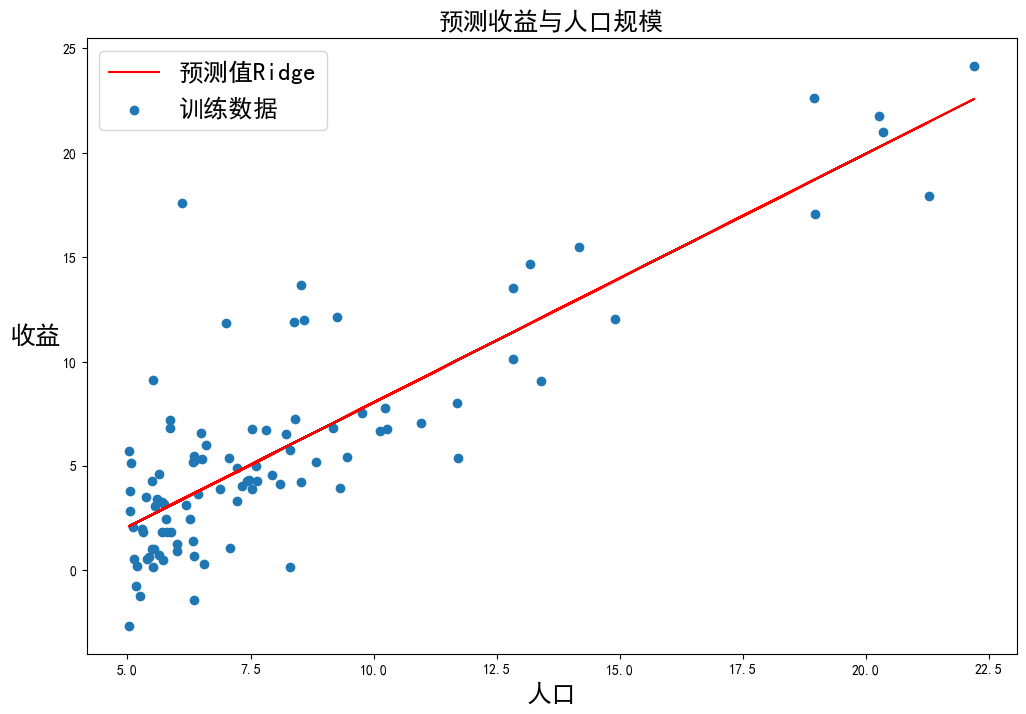

In [500]:
#4 L2正则化
#（1）从 sklearn.linear_model 导入岭回归模型 Ridge
from sklearn.linear_model import Ridge
#（2）使用 Ridge 创建模型
lr = Ridge()
#（3）对X和y使用 Ridge的fit()函数更新模型的参数
lr.fit(X[:,1:2],y)
#（4）重复3.5(4)中的步骤，绘制图表：
#  1） 取特征矩阵 X 的第二列作为自变量 x
x = X[:, 1]
#  2） 使用模型对x进行预测，并将预测结果展平为一维数组 f
f = lr.predict(x.reshape(-1,1)).flatten()
#  3） 创建画布和坐标轴对象
fig1,ax1 = plt.subplots(figsize = (12,8))
#  4） 在坐标轴上绘制预测值 f 随人口规模 x 的变化曲线，使用红色线条，并添加标签为"预测值Ridge"
ax1.plot(x,f,"r",label = "预测值Ridge")
#  5） 在坐标轴上绘制训练数据点的散点图，并添加标签为"训练数据"
ax1.scatter(x,y,label = "训练数据")
#  6） 显示图例，并设置位置和字体大小（loc = 2,fontsize=18）
ax1.legend(loc=2,fontsize = 18)
#  7） 设置 x 轴标签为"人口"，字体大小为18
ax1.set_xlabel('人口', fontsize=18)
#  8） 设置 y 轴标签为"收益"，旋转角度为0，字体大小为18
ax1.set_ylabel('收益', rotation=0, fontsize=18,labelpad = 20)
#  9） 设置图表标题为"预测收益和人口规模"，字体大小为18
ax1.set_title("预测收益与人口规模", fontsize=18)
print(f"ridge's coef:{lr.coef_}")

Text(0.5, 1.0, '预测收益与人口规模')

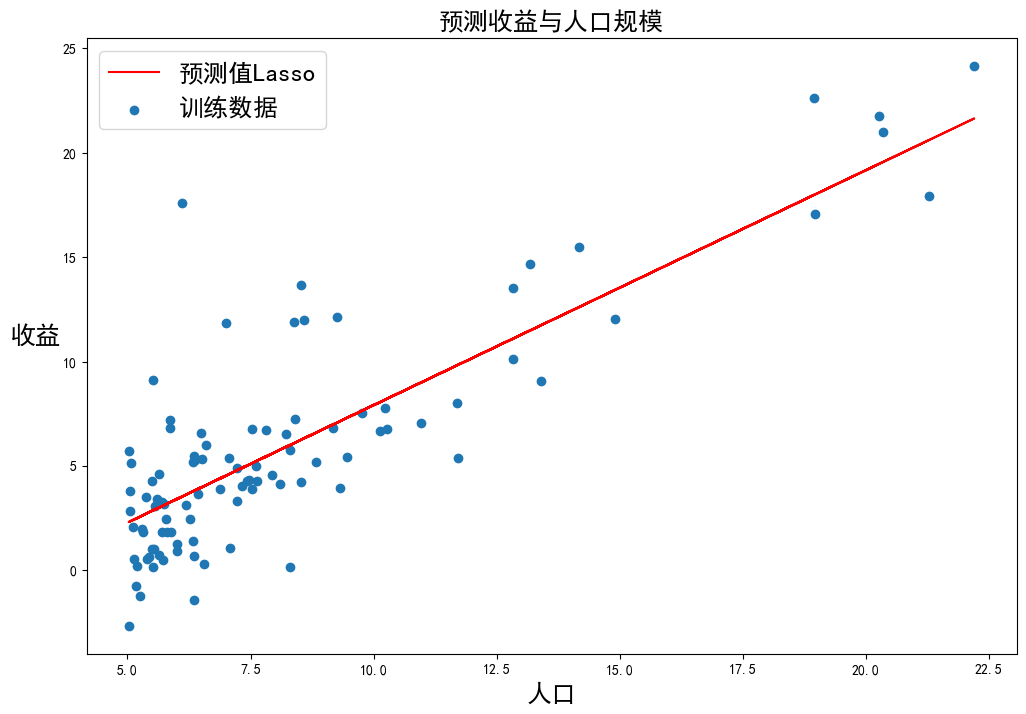

In [501]:
#5 L1正则化
#（1）从 sklearn.linear_model 导入回归模型 Lasso
from sklearn.linear_model import Lasso
#（2）使用 Lasso 创建模型
lasso = Lasso()
#（3）对X和y使用 Lasso的fit()函数更新模型的参数
lasso.fit(X[:,1:2],y)
#（4） 重复4(4)中的步骤，绘制图表：
#  1） 取特征矩阵 X 的第二列作为自变量 x
x = X[:, 1]
#  2） 使用模型对x进行预测，并将预测结果展平为一维数组 f
f = lasso.predict(x.reshape(-1,1)).flatten()
#  3） 创建画布和坐标轴对象
fig2,ax2 = plt.subplots(figsize = (12,8))
#  4） 在坐标轴上绘制预测值 f 随人口规模 x 的变化曲线，使用红色线条，并添加标签为"预测值Lasso"
ax2.plot(x,f,"r",label = "预测值Lasso")
#  5） 在坐标轴上绘制训练数据点的散点图，并添加标签为"训练数据"
ax2.scatter(x,y,label = "训练数据")
#  6） 显示图例，并设置位置和字体大小（loc = 2,fontsize=18）
ax2.legend(loc=2,fontsize = 18)
#  7） 设置 x 轴标签为"人口"，字体大小为18
ax2.set_xlabel('人口', fontsize=18)
#  8） 设置 y 轴标签为"收益"，旋转角度为0，字体大小为18
ax2.set_ylabel('收益', rotation=0, fontsize=18,labelpad = 20)
#  9） 设置图表标题为"预测收益和人口规模"，字体大小为18
ax2.set_title("预测收益与人口规模", fontsize=18)

Text(0.5, 1.0, 'Alpha vs CV Error')

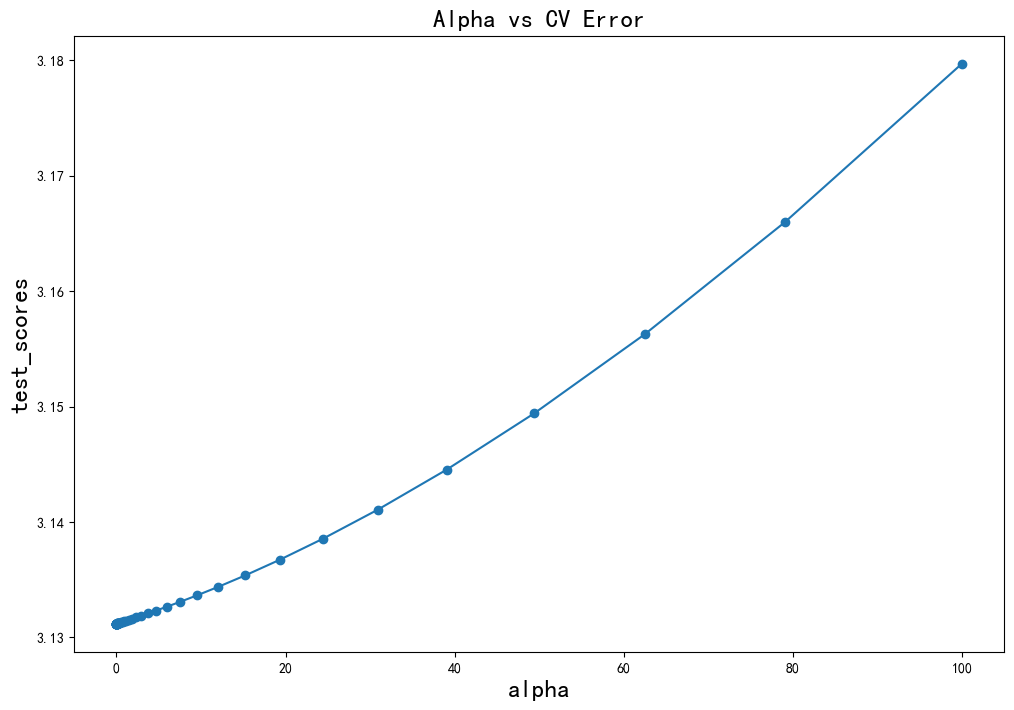

In [502]:
#6 调参
#（1）从 sklearn.model_selection 导入 cross_val_score
from sklearn.model_selection import cross_val_score
#（2）使用 np.logspace 定义一组不同的alpha值，要求从0.001（1e-3）到100（1e2）生成均匀的50个数值
alphas = np.logspace(-3,2,50)
#（3）初始化一个空列表 test_scores，用于存储测试分数
test_scores = []
#（4）遍历每个alpha值，做以下事情：
#  1）创建一个Ridge回归模型，设置alpha值
#  2）使用交叉验证计算负均方误差的平方根，交叉验证的折数为5，所得分数记为 test_score
#  3) 对 test_score取平均数，存入test_scores
for alpha in alphas:
    lr = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(lr,X,y,cv=5,scoring="neg_mean_squared_error"))
    test_scores.append(np.mean(test_score))
#（5）根据 alpha 和 test_scores绘制折线图，并将标题设置为"Alpha vs CV Error"
plt.figure(figsize=(12, 8))
plt.plot(alphas, test_scores,marker = "o")
plt.xlabel('alpha', fontsize=18)
plt.ylabel('test_scores', fontsize=18)
plt.title('Alpha vs CV Error', fontsize=18)

In [503]:
#7 最小二乘法（LSM）
#（1）实现LSM算法
def LSM(X, y):
    # 计算矩阵X的转置与X相乘，再求逆矩阵，最后将结果与X的转置相乘，再与向量y相乘，得到权重w
    w = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return w
#（2）对X和y使用LSM算法，获得最终的参数final_w2
final_w2 = LSM(X[:,1:2],y)
#（3）输出final_w2和w，进行对比
print(final_w2)
print(w)

[[0.80252685]]
[[-3.78806857]
 [ 1.18221277]]
